<a href="https://colab.research.google.com/github/LemdjoM/Arduino/blob/master/labs/10%20-%20Classification%201/Exercises/exercise_class1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center"> Classification 1 – Exercises</h1>

<div>
<td>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/2b/Logo_Universit%C3%A9_de_Lausanne.svg/2000px-Logo_Universit%C3%A9_de_Lausanne.svg.png" style="padding-right:10px;width:240px;float:left"/></td>
<h2 style="white-space: nowrap">Business Intelligence and Analytics</h2></td>
<hr style="clear:both">
<p style="font-size:0.85em; margin:2px; text-align:justify">

</div>

# Classification

## Logistic Regression

In this lab we will explore logistic regression which is a well known method for classification problems. We will work with a heart disease data-set, and we will try to predict whether the patient has a heart disease or not.


![Heart](https://img.webmd.com/dtmcms/live/webmd/consumer_assets/site_images/articles/health_tools/how_heart_disease_affects_your_body_slideshow/493ss_thinkstock_rf_heart_anatomy_illustration.jpg)


In [51]:
# Imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import collections  as mc
%load_ext autoreload
%autoreload 2
import pandas as pd
import seaborn as sns
# sklearn imports
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
sns.set_style("white")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
# set random seed
np.random.seed(72)

### Load data

We will start with the heart disease data-set. Here's a description of the attributes in the data-set:

1. `age`
2. `sex`
3. `cp`: chest pain type (4 values)
4. `trestbps`: resting blood pressure
5. `chol`: serum cholestoral in mg/dl
6. `fbs`: fasting blood sugar > 120 mg/dl
7. `restecg`: resting electrocardiographic results (values 0,1,2)
8. `thalach`: maximum heart rate achieved
9. `exang`: exercise induced angina
10. `target`: presence of heart disease (1), absence of heart disease(0)







In [53]:
#Load data
# data-set: heart.csv
url = "https://media.githubusercontent.com/media/michalis0/Business-Intelligence-and-Analytics/master/data/heart.csv"
df = pd.read_csv(url)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,target
0,63,M,D,145,233,yes,A,150,no,1
1,37,M,C,130,250,no,B,187,no,1
2,41,F,B,130,204,no,A,172,no,1
3,56,M,B,120,236,no,B,178,no,1
4,57,F,A,120,354,no,B,163,yes,1


### Simple Logistic Regression

Let's start with only 2 features to predict heart diseases: age and maximum heart rate achieved (`thalach`). Define your features and target variable.

In [54]:
X = df[['age', 'thalach']]
y = df['target']
print(X)
print(y)

     age  thalach
0     63      150
1     37      187
2     41      172
3     56      178
4     57      163
..   ...      ...
298   57      123
299   45      132
300   68      141
301   57      115
302   57      174

[303 rows x 2 columns]
0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


Split your data set into train and test subsets.

Use ` test_size=0.3, random_state=72` as parameters

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=72)
print(f"Training set: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set: X_test={X_test.shape}, y_test={y_test.shape}")

Training set: X_train=(212, 2), y_train=(212,)
Test set: X_test=(91, 2), y_test=(91,)


#### Standardizing

When you do standardization (or any other modification) to the training data, you have to apply the same modifications to the test data as well.

Here we apply the same standardisation to test data, which means that we normalize the test data with mean and standard deviation from the train data.

Use *StandardScaler()* for normalization.

In [56]:
# Create and fit the scaler
scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
# fit the scaler to the training set of features
scaler.fit(X_train) # here the scaler learns the min and max of each attribute from the training set


StandardScaler()

Apply the standardization to your train and test set.

In [57]:
# Transform the train and test set
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
#X_test_scaled = scaler.transform(X_test)
print("Scaled X_train:\n", X_train[:5])
print("Scaled X_test:\n", X_test[:5])

Scaled X_train:
 [[ 0.4220026  -0.40481988]
 [-1.23884923  0.52207257]
 [ 0.97561988 -0.10989955]
 [ 1.19706679  0.05862634]
 [-0.24233813  1.44896501]]
Scaled X_test:
 [[-0.5745085  -0.44695135]
 [-0.02089122  0.10075782]
 [-1.68174305  1.36470206]
 [ 2.4150248  -1.41597527]
 [-0.79595541 -0.27842545]]


Define your model. Try to use a logistic regression with cross validation using theses parameters : `solver='lbfgs', cv=10, max_iter=100, random_sate=72`

In [58]:
# Logistic regression with 10 fold cross validation
#model = LogisticRegression(solver='lbfgs', cv=10, max_iter=100, random_state=72)
model = LogisticRegressionCV(solver='lbfgs', cv=10, max_iter=100, random_state=72)

Fit your model now using the train set.

In [59]:
# Fit your model on the train set
#Fit model
model.fit(X_train, y_train)

LogisticRegressionCV(cv=10, random_state=72)

Compare your train and test accuracy for your model.

> Add blockquote



In [60]:
# Train accuracy with CV

# Also possible to calculate accuracy on the training set
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(model.score(X_train, y_train)))

Accuracy of Logistic regression classifier on training set: 0.69


In [61]:
# Test accuracy with CV
#Use model on test and check accuracy
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(model.score(X_test, y_test)))

Accuracy of Logistic regression classifier on test set: 0.71


[link text](https://)Have a look at the class distribution

<ipython-input-62-7ee7d891c089>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


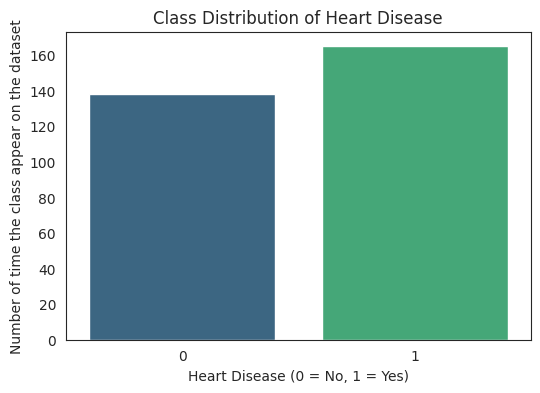

In [62]:
# Create a bar chart to represent the distribution of the target
# Count occurrences of each class
class_counts = df['target'].value_counts()

# Create a bar chart
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")

# Labels and title
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Number of time the class appear on the dataset")
plt.title("Class Distribution of Heart Disease")

# Show the plot
plt.show()

Compute the baserate.

$$Base rate = \frac{Most\_frequent\_class}{Total\_observations}$$

In [63]:
#Compute the base rate

nbr_heart_disease = df.loc[df["target"] == 1].shape[0]
print(f'There are {nbr_heart_disease} observations with heart diseases')

nbr_no_heart_disease = df.loc[df["target"] == 0].shape[0]
print(f'There are {nbr_no_heart_disease} observations with no heart diseases')

base_rate = max(nbr_no_heart_disease, nbr_heart_disease)/(df["target"].shape[0])
print(f'The Base rate is : {base_rate}')

There are 165 observations with heart diseases
There are 138 observations with no heart diseases
The Base rate is : 0.5445544554455446


Use the confusion_matrix module to show the confusion matrix of the test set.

In [64]:
from sklearn.metrics import confusion_matrix
# Create the confusion matrix of the test set
y_pred= model.predict(X_test)
y_pred
confusion_matrix(y_test, y_pred)


array([[25, 13],
       [13, 40]])

Plot the confusion matrix

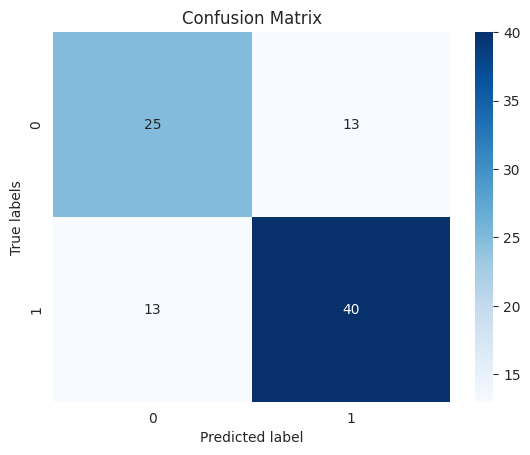

In [65]:
# Plot the confusion matrix using sns.heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)), annot=True, cmap='Blues', fmt='.4g')
plt.xlabel('Predicted label')
plt.ylabel('True labels')
plt.title('Confusion Matrix');

### Predictions

Try to predict the class and probability of correct classification for `patient 1` `Age = 35, Thalach = 160 and `patient 2` Age = 70, Thalach = 130`

**Important: This exercise answers the question of the Moodle quizz.**

In [66]:
# Create a data frame with our two suspects
features =  pd.DataFrame({
    'age': [35, 70],
    'thalach': [160, 130]
})

# Create and fit the Scaler
scaler = StandardScaler()
scaler.fit(features)

# Transform the features
features = scaler.transform(features)

# Create the predictions
predictions_q1 = model.predict(features)
print(f'The first patient has a prediction of {predictions_q1[0]} and the second one {predictions_q1[1]}')

#Create the probabilities of each prediction
proba_q1 =  model.predict_proba(features)
print(f'The probabilities of the first patient are {proba_q1[0][1]:.2f} and {proba_q1[1][1]:.2f} for the second ')




The first patient has a prediction of 1 and the second one 0
The probabilities of the first patient are 0.75 and 0.29 for the second 


### Decision boundary

As we used only two features for classification, we can observe the linear decision boundary made by the logistic regression in a 2D plot. You can also observe the mis-classified training points in this plot. Let's plot the decision boundary for the model with cross validation.

Use theses parameters for the Logistic Regression model `solver='lbfgs', cv=10, max_iter=100`

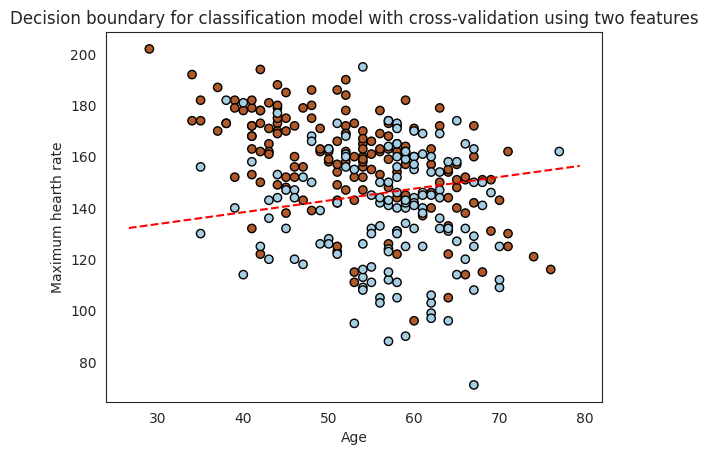

In [67]:
#Decision boundary
import numpy as np
import matplotlib.pyplot as plt

# Create and fit the model on X and y (use all the available data without spliting)
model = LogisticRegressionCV(
    solver='lbfgs',  # Solver method
    cv=10,           # 10-fold cross-validation
    max_iter=100    # Max iterations for convergence
    #random_state=72  # Fixing seed for reproducibility
)

# Fit the model on the entire dataset
model.fit(X, y)

#plt.scatter('Your code here', 'Your code here', c='Your code Here', edgecolors='k', cmap=plt.cm.Paired)
plt.scatter(X['age'].values, X['thalach'].values, c=y, edgecolors='k', cmap=plt.cm.Paired)
ax = plt.gca()
#x_vals = 'Your code here'
x_vals = np.array(ax.get_xlim())
#y_vals = 'Your code here'
y_vals = (-x_vals * model.coef_[0][0] - model.intercept_[0])/model.coef_[0][1]
plt.plot(x_vals, y_vals, '--', c="red")


plt.xlabel('Age')
plt.ylabel('Maximum hearth rate')


plt.title('Decision boundary for classification model with cross-validation using two features')

plt.show()

### Adding features

Now let's try more numerical features and see if the accuracy improuves.

> Add blockquote


We will use now `"age", "thalach", "trestbps" and "chol"`.
Define your features and your target variable.

In [68]:
X = df[['age', 'thalach', 'trestbps', 'chol']]
y = df['target']

Split your data set into train and test subsets. ` test_size=0.3, random_state=72`

In [69]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=72)

Standardize your data.

In [70]:
# Create and fit the scaler
# Create the scaler
scaler = StandardScaler()

# Fit the scaler to the training data
scaler.fit(X_train)

StandardScaler()

In [71]:
#Apply normalization to the training and testing set
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Fit your model using the train data. Let's use the logistic regression with cross validation here.

In [72]:
# Fit the regression model on the training data
model = LogisticRegressionCV(
    solver='lbfgs',  # Solver method
    cv=10,           # 10-fold cross-validation
    max_iter=100,    # Maximum iterations for convergence
    random_state=72  # Fixing seed for reproducibility
)

# Fit the model on the training data
model.fit(X_train, y_train)

LogisticRegressionCV(cv=10, random_state=72)

Compare your train and test accurary.
How did the train and test accuracy change when adding theses additionals features?




In [73]:
# Train accuracy
train_accuracy = model.score(X_train, y_train)
print(f"Train Accuracy: {train_accuracy:.4f}")

Train Accuracy: 0.7170


In [74]:
# Test accuracy
test_accuracy = model.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.7033


Finally, show the confusion matrix.

In [75]:
from sklearn.metrics import confusion_matrix
#Create the confusion matrix
# Generate predictions for the test set
y_pred = model.predict(X_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Convert to DataFrame for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual: No Disease', 'Actual: Heart Disease'],
                              columns=['Predicted: No Disease', 'Predicted: Heart Disease'])

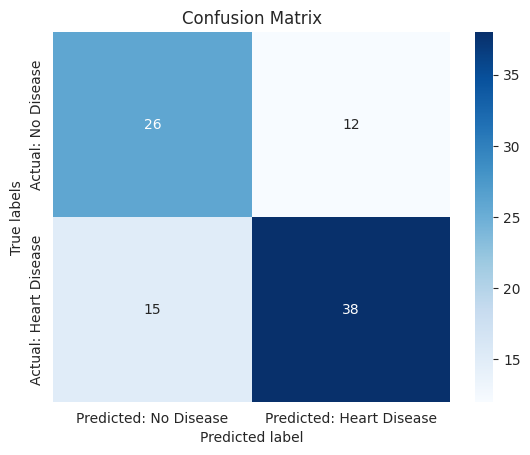

In [76]:
#sns.heatmap(pd.DataFrame('Your Code Here'), annot=True, cmap='Blues', fmt='.4g')
sns.heatmap(conf_matrix_df, annot=True, cmap='Blues', fmt='.4g')
plt.xlabel('Predicted label')
plt.ylabel('True labels')
plt.title('Confusion Matrix');